In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import os
import cv2
import numpy as np
import tensorflow as tf

In [74]:
# Load the saved model
model_dir = '/content/drive/MyDrive/Colab_Notebooks/Model'
loaded_model = tf.saved_model.load(model_dir)
infer = loaded_model.signatures["serving_default"]

In [75]:

print(loaded_model.signatures.keys())

infer = loaded_model.signatures["serving_default"]
print(infer.structured_outputs)

KeysView(_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, input_1) at 0x7FB15135BC70>}))
{'dense_1': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_1')}


In [76]:
# Replace with the path to your directory
directory_path = "/content/drive/MyDrive/Colab_Notebooks/Test"

In [77]:
# Create empty lists to store file paths and labels
listImageFilePaths = []

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        # Check if the file is an image file
        if filename.lower().endswith(('.bmp', '.gif', '.jpeg', '.jpg', '.png')):
            # Add the file path to the list
            listImageFilePaths.append(os.path.join(dirname, filename))

# Print the total number of images
print('Total images: ', len(listImageFilePaths))

Total images:  6


In [78]:
images = []
for image_path in listImageFilePaths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.asarray(img, dtype=np.float32) / 255.0
    images.append(img)
images = np.stack(images, axis=0)

In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    plt.show()

In [80]:
# Use the loaded model to make predictions on the images
output = infer(input_1=images)
predictions = output['dense_1']
predictions

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.9402927 ],
       [0.10293172],
       [0.95742327],
       [0.26349136],
       [0.9807165 ],
       [0.84818095]], dtype=float32)>

Image path /content/drive/MyDrive/Colab_Notebooks/Test/27.jpg


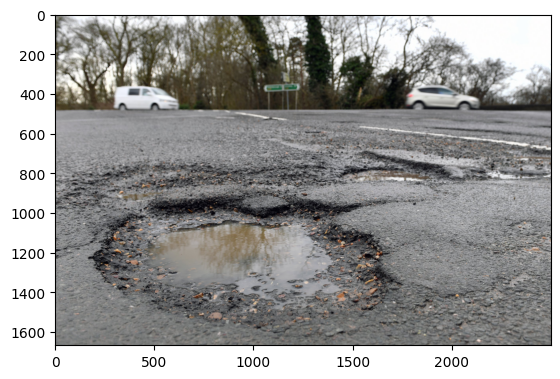

Pothole detected
Image path /content/drive/MyDrive/Colab_Notebooks/Test/Plain1361.jpg


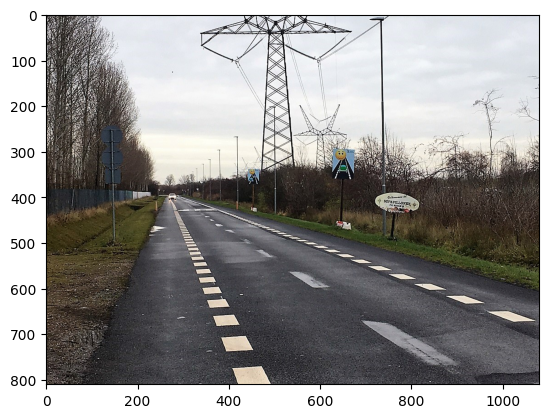

No Pothole
Image path /content/drive/MyDrive/Colab_Notebooks/Test/11.jpg


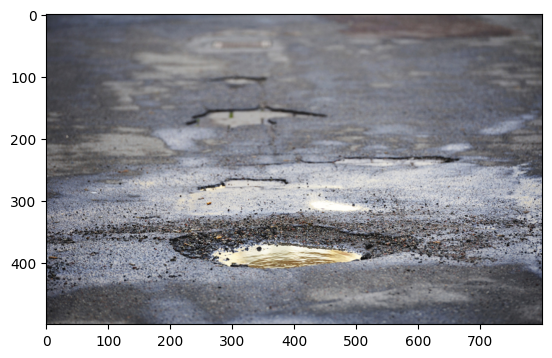

Pothole detected
Image path /content/drive/MyDrive/Colab_Notebooks/Test/Plain1354.jpg


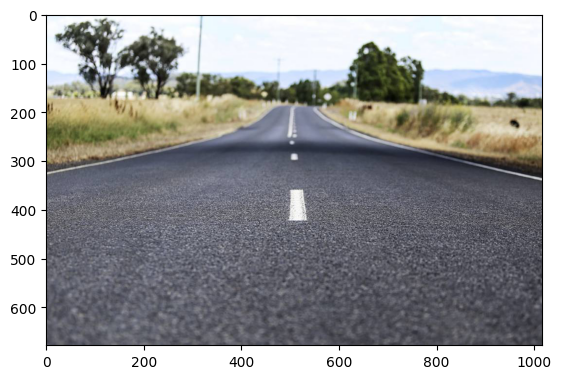

No Pothole
Image path /content/drive/MyDrive/Colab_Notebooks/Test/68.jpg


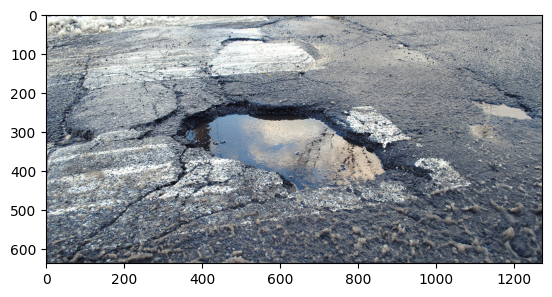

Pothole detected
Image path /content/drive/MyDrive/Colab_Notebooks/Test/133.jpg


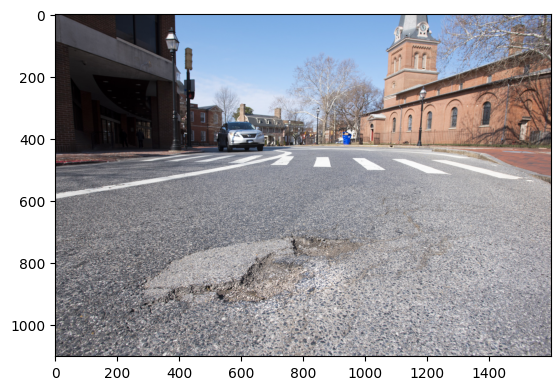

Pothole detected


In [81]:
pathPotholes=[]
for i in range(len(listImageFilePaths)):
  displayImage(listImageFilePaths[i])
  print('Pothole detected' if predictions[i]>=0.5 else 'No Pothole')
  pathPotholes.append(listImageFilePaths[i])

In [85]:
import cv2

def calculateArea(img):
    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply a threshold to the image to create a binary mask
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # find the contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    areas=[]
    # loop over the contours and calculate the area of each contour
    for contour in contours:
        area = cv2.contourArea(contour)
        if(area>0.0):
            # print('Area of pothole:', area)
            areas.append(area)
    #print('Area of pothole:', round(sum(areas)/len(areas),3))
    return round(sum(areas)/len(areas),3)

Image path /content/drive/MyDrive/Colab_Notebooks/Test/27.jpg


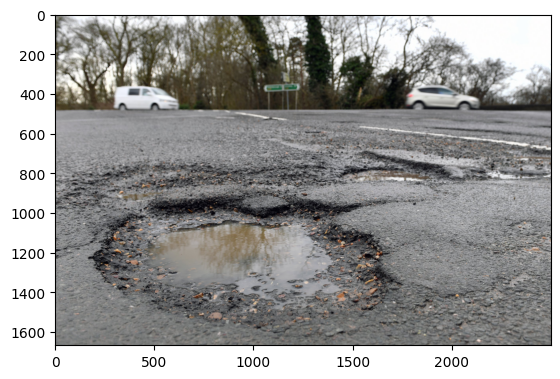

Predicted area = 538.767 sq. units
Image path /content/drive/MyDrive/Colab_Notebooks/Test/Plain1361.jpg


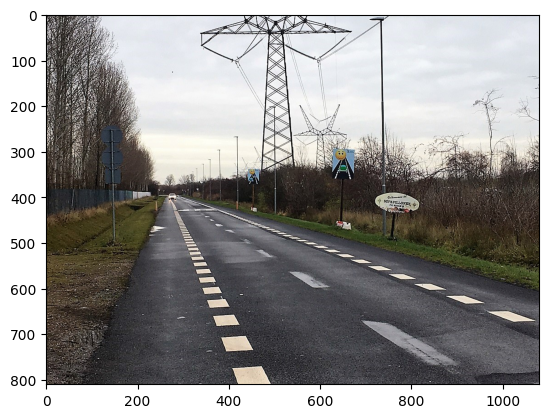

Predicted area = 3261.865 sq. units
Image path /content/drive/MyDrive/Colab_Notebooks/Test/11.jpg


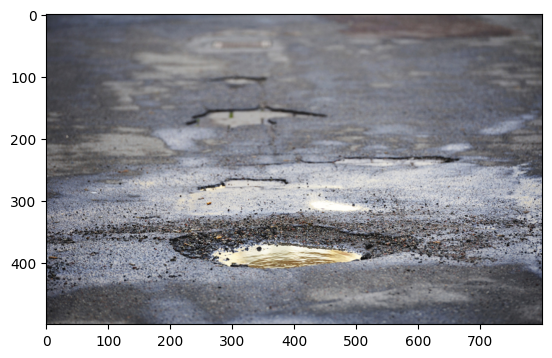

Predicted area = 1028.62 sq. units
Image path /content/drive/MyDrive/Colab_Notebooks/Test/Plain1354.jpg


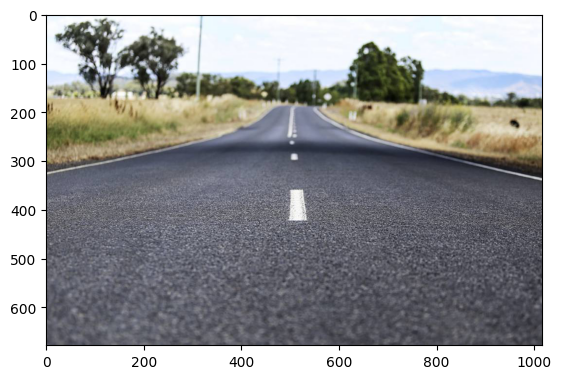

Predicted area = 13191.667 sq. units
Image path /content/drive/MyDrive/Colab_Notebooks/Test/68.jpg


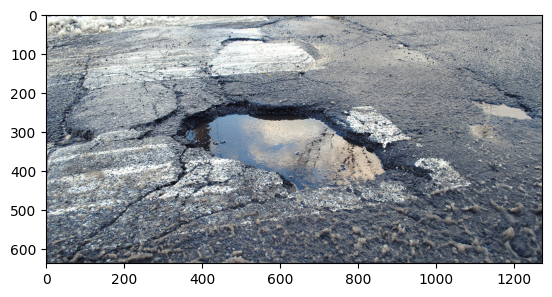

Predicted area = 204.308 sq. units
Image path /content/drive/MyDrive/Colab_Notebooks/Test/133.jpg


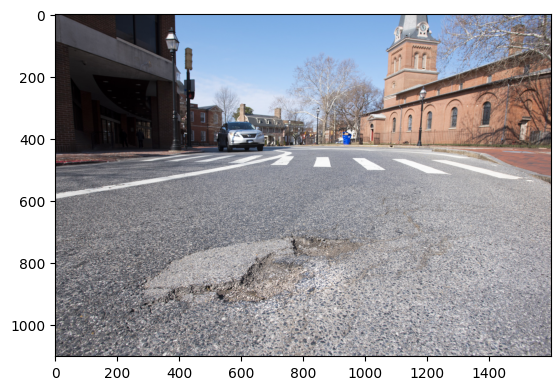

Predicted area = 93.684 sq. units


In [89]:
for i in range(len(pathPotholes)):
  displayImage(listImageFilePaths[i])
  img = cv2.imread(listImageFilePaths[i])
  print('Predicted area =', calculateArea(img), 'sq. units')